In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from sklearn.metrics import r2_score

In [2]:
os.chdir("C:\\Users\\AISHWARYA\\Downloads\\Datasets-main\\ML")

### load data set

In [3]:
df1=pd.read_csv('50_Startups.csv')
print(df1)

    R&D Spend  Administration  Marketing Spend       State     Profit
0   165349.20       136897.80        471784.10    New York  192261.83
1   162597.70       151377.59        443898.53  California  191792.06
2   153441.51       101145.55        407934.54     Florida  191050.39
3   144372.41       118671.85        383199.62    New York  182901.99
4   142107.34        91391.77        366168.42  California  166187.94
5   131876.90        99814.71        362861.36    New York  156991.12
6   134615.46       147198.87        127716.82  California  156122.51
7   130298.13       145530.06        323876.68    New York  155752.60
8   120542.52       148718.95        311613.29    New York  152211.77
9   123334.88       108679.17        304981.62  California  149759.96
10  101913.08       110594.11        229160.95  California  146121.95
11  100671.96        91790.61        249744.55     Florida  144259.40
12   93863.75       127320.38        249839.44  California  141585.52
13   91992.39       

### split x and y

### create x

In [4]:
x=df1.iloc[:,:-1].values
print(x)

[[165349.2 136897.8 471784.1 'New York']
 [162597.7 151377.59 443898.53 'California']
 [153441.51 101145.55 407934.54 'Florida']
 [144372.41 118671.85 383199.62 'New York']
 [142107.34 91391.77 366168.42 'California']
 [131876.9 99814.71 362861.36 'New York']
 [134615.46 147198.87 127716.82 'California']
 [130298.13 145530.06 323876.68 'New York']
 [120542.52 148718.95 311613.29 'New York']
 [123334.88 108679.17 304981.62 'California']
 [101913.08 110594.11 229160.95 'California']
 [100671.96 91790.61 249744.55 'Florida']
 [93863.75 127320.38 249839.44 'California']
 [91992.39 135495.07 252664.93 'California']
 [119943.24 156547.42 256512.92 'Florida']
 [114523.61 122616.84 261776.23 'New York']
 [78013.11 121597.55 264346.06 'California']
 [94657.16 145077.58 282574.31 'New York']
 [91749.16 114175.79 294919.57 'New York']
 [86419.7 153514.11 0.0 'Florida']
 [76253.86 113867.3 298664.47 'California']
 [78389.47 153773.43 299737.29 'New York']
 [73994.56 122782.75 303319.26 'California

### create y

In [5]:
y=df1.iloc[:,4].values
print(y)

[192261.83 191792.06 191050.39 182901.99 166187.94 156991.12 156122.51
 155752.6  152211.77 149759.96 146121.95 144259.4  141585.52 134307.35
 132602.65 129917.04 126992.93 125370.37 124266.9  122776.86 118474.03
 111313.02 110352.25 108733.99 108552.04 107404.34 105733.54 105008.31
 103282.38 101004.64  99937.59  97483.56  97427.84  96778.92  96712.8
  96479.51  90708.19  89949.14  81229.06  81005.76  78239.91  77798.83
  71498.49  69758.98  65200.33  64926.08  49490.75  42559.73  35673.41
  14681.4 ]


### label encoding

In [6]:
from sklearn.preprocessing import LabelEncoder
Label=LabelEncoder()
x[:,3]=Label.fit_transform(x[:,3])
print(x)

[[165349.2 136897.8 471784.1 2]
 [162597.7 151377.59 443898.53 0]
 [153441.51 101145.55 407934.54 1]
 [144372.41 118671.85 383199.62 2]
 [142107.34 91391.77 366168.42 0]
 [131876.9 99814.71 362861.36 2]
 [134615.46 147198.87 127716.82 0]
 [130298.13 145530.06 323876.68 2]
 [120542.52 148718.95 311613.29 2]
 [123334.88 108679.17 304981.62 0]
 [101913.08 110594.11 229160.95 0]
 [100671.96 91790.61 249744.55 1]
 [93863.75 127320.38 249839.44 0]
 [91992.39 135495.07 252664.93 0]
 [119943.24 156547.42 256512.92 1]
 [114523.61 122616.84 261776.23 2]
 [78013.11 121597.55 264346.06 0]
 [94657.16 145077.58 282574.31 2]
 [91749.16 114175.79 294919.57 2]
 [86419.7 153514.11 0.0 1]
 [76253.86 113867.3 298664.47 0]
 [78389.47 153773.43 299737.29 2]
 [73994.56 122782.75 303319.26 0]
 [67532.53 105751.03 304768.73 0]
 [77044.01 99281.34 140574.81 2]
 [64664.71 139553.16 137962.62 0]
 [75328.87 144135.98 134050.07 2]
 [72107.6 127864.55 353183.81 2]
 [66051.52 182645.56 118148.2 1]
 [65605.48 153032.0

### OneHotEncoding

In [7]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct=ColumnTransformer(transformers=[('encoder',OneHotEncoder(),[3])],remainder='passthrough')
x=np.array(ct.fit_transform(x))
print(x)

[[0.0 0.0 1.0 165349.2 136897.8 471784.1]
 [1.0 0.0 0.0 162597.7 151377.59 443898.53]
 [0.0 1.0 0.0 153441.51 101145.55 407934.54]
 [0.0 0.0 1.0 144372.41 118671.85 383199.62]
 [1.0 0.0 0.0 142107.34 91391.77 366168.42]
 [0.0 0.0 1.0 131876.9 99814.71 362861.36]
 [1.0 0.0 0.0 134615.46 147198.87 127716.82]
 [0.0 0.0 1.0 130298.13 145530.06 323876.68]
 [0.0 0.0 1.0 120542.52 148718.95 311613.29]
 [1.0 0.0 0.0 123334.88 108679.17 304981.62]
 [1.0 0.0 0.0 101913.08 110594.11 229160.95]
 [0.0 1.0 0.0 100671.96 91790.61 249744.55]
 [1.0 0.0 0.0 93863.75 127320.38 249839.44]
 [1.0 0.0 0.0 91992.39 135495.07 252664.93]
 [0.0 1.0 0.0 119943.24 156547.42 256512.92]
 [0.0 0.0 1.0 114523.61 122616.84 261776.23]
 [1.0 0.0 0.0 78013.11 121597.55 264346.06]
 [0.0 0.0 1.0 94657.16 145077.58 282574.31]
 [0.0 0.0 1.0 91749.16 114175.79 294919.57]
 [0.0 1.0 0.0 86419.7 153514.11 0.0]
 [1.0 0.0 0.0 76253.86 113867.3 298664.47]
 [0.0 0.0 1.0 78389.47 153773.43 299737.29]
 [1.0 0.0 0.0 73994.56 122782.75 3

In [8]:
print(pd.DataFrame(x))

      0    1    2          3          4          5
0   0.0  0.0  1.0   165349.2   136897.8   471784.1
1   1.0  0.0  0.0   162597.7  151377.59  443898.53
2   0.0  1.0  0.0  153441.51  101145.55  407934.54
3   0.0  0.0  1.0  144372.41  118671.85  383199.62
4   1.0  0.0  0.0  142107.34   91391.77  366168.42
5   0.0  0.0  1.0   131876.9   99814.71  362861.36
6   1.0  0.0  0.0  134615.46  147198.87  127716.82
7   0.0  0.0  1.0  130298.13  145530.06  323876.68
8   0.0  0.0  1.0  120542.52  148718.95  311613.29
9   1.0  0.0  0.0  123334.88  108679.17  304981.62
10  1.0  0.0  0.0  101913.08  110594.11  229160.95
11  0.0  1.0  0.0  100671.96   91790.61  249744.55
12  1.0  0.0  0.0   93863.75  127320.38  249839.44
13  1.0  0.0  0.0   91992.39  135495.07  252664.93
14  0.0  1.0  0.0  119943.24  156547.42  256512.92
15  0.0  0.0  1.0  114523.61  122616.84  261776.23
16  1.0  0.0  0.0   78013.11  121597.55  264346.06
17  0.0  0.0  1.0   94657.16  145077.58  282574.31
18  0.0  0.0  1.0   91749.16  1

### Split the data as train , test split


In [9]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
print('X Shape-',x.shape)
print('Y Shape-',y.shape)
print('X_Train Shape-',x_train.shape)
print('Y_Train Shape-',y_train.shape)
print('X_Test Shape-',x_test.shape)
print('Y_Test Shape-',y_test.shape)

X Shape- (50, 6)
Y Shape- (50,)
X_Train Shape- (40, 6)
Y_Train Shape- (40,)
X_Test Shape- (10, 6)
Y_Test Shape- (10,)


### create the model

In [10]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(x_train,y_train)
print(lr)

LinearRegression()


### predictions

In [11]:
y_pred=lr.predict(x_test)
print(y_pred)

[125685.70020547  84338.92317125  99390.93658771  46818.58913863
 128971.45588835  52062.29882122 109174.11382464  99985.25961746
  97162.65075521 115228.18387685]


In [12]:
y_test

array([134307.35,  81005.76,  99937.59,  64926.08, 125370.37,  35673.41,
       105733.54, 107404.34,  97427.84, 122776.86])

### print test result with difference

In [13]:
result=pd.concat([pd.DataFrame(y_pred,columns=['Predicton']),pd.DataFrame(y_test,columns=['Y_Test'])],axis=1)
result['Difference']=y_test-y_pred
print(result)

       Predicton     Y_Test    Difference
0  125685.700205  134307.35   8621.649795
1   84338.923171   81005.76  -3333.163171
2   99390.936588   99937.59    546.653412
3   46818.589139   64926.08  18107.490861
4  128971.455888  125370.37  -3601.085888
5   52062.298821   35673.41 -16388.888821
6  109174.113825  105733.54  -3440.573825
7   99985.259617  107404.34   7419.080383
8   97162.650755   97427.84    265.189245
9  115228.183877  122776.86   7548.676123


### accuracy

In [14]:
accuracy=r2_score(y_test,y_pred)
print(accuracy)

0.8988481687284339


In [15]:
x_test

array([[1.0, 0.0, 0.0, 91992.39, 135495.07, 252664.93],
       [1.0, 0.0, 0.0, 38558.51, 82982.09, 174999.3],
       [0.0, 0.0, 1.0, 61994.48, 115641.28, 91131.24],
       [0.0, 0.0, 1.0, 1000.23, 124153.04, 1903.93],
       [0.0, 0.0, 1.0, 94657.16, 145077.58, 282574.31],
       [0.0, 0.0, 1.0, 542.05, 51743.15, 0.0],
       [0.0, 0.0, 1.0, 75328.87, 144135.98, 134050.07],
       [1.0, 0.0, 0.0, 64664.71, 139553.16, 137962.62],
       [1.0, 0.0, 0.0, 63408.86, 129219.61, 46085.25],
       [0.0, 1.0, 0.0, 86419.7, 153514.11, 0.0]], dtype=object)

### print y and prediction in one data frame-concat

In [16]:
y_pre=pd.DataFrame(y_pred,columns=['Prediction'])
y_te=pd.DataFrame(y_test,columns=['Actual'])
x_te=pd.DataFrame(x_test,columns=['CF','FR','New Y','R&D','Admin','Mark'])
result=pd.concat([x_te,y_te,y_pre],axis=1)
result['Difference']=y_pre['Prediction']-y_te['Actual']
display(result)

,CF,FR,New Y,R&D,Admin,Mark,Actual,Prediction,Difference
0,1.0,0.0,0.0,91992.39,135495.07,252664.93,134307.35,125685.700205,-8621.649795
1,1.0,0.0,0.0,38558.51,82982.09,174999.3,81005.76,84338.923171,3333.163171
2,0.0,0.0,1.0,61994.48,115641.28,91131.24,99937.59,99390.936588,-546.653412
3,0.0,0.0,1.0,1000.23,124153.04,1903.93,64926.08,46818.589139,-18107.490861
4,0.0,0.0,1.0,94657.16,145077.58,282574.31,125370.37,128971.455888,3601.085888
5,0.0,0.0,1.0,542.05,51743.15,0.0,35673.41,52062.298821,16388.888821
6,0.0,0.0,1.0,75328.87,144135.98,134050.07,105733.54,109174.113825,3440.573825
7,1.0,0.0,0.0,64664.71,139553.16,137962.62,107404.34,99985.259617,-7419.080383
8,1.0,0.0,0.0,63408.86,129219.61,46085.25,97427.84,97162.650755,-265.189245
9,0.0,1.0,0.0,86419.7,153514.11,0.0,122776.86,115228.183877,-7548.676123


In [17]:
y_pred

array([125685.70020547,  84338.92317125,  99390.93658771,  46818.58913863,
       128971.45588835,  52062.29882122, 109174.11382464,  99985.25961746,
        97162.65075521, 115228.18387685])

In [18]:
y_test

array([134307.35,  81005.76,  99937.59,  64926.08, 125370.37,  35673.41,
       105733.54, 107404.34,  97427.84, 122776.86])

In [19]:
x_test

array([[1.0, 0.0, 0.0, 91992.39, 135495.07, 252664.93],
       [1.0, 0.0, 0.0, 38558.51, 82982.09, 174999.3],
       [0.0, 0.0, 1.0, 61994.48, 115641.28, 91131.24],
       [0.0, 0.0, 1.0, 1000.23, 124153.04, 1903.93],
       [0.0, 0.0, 1.0, 94657.16, 145077.58, 282574.31],
       [0.0, 0.0, 1.0, 542.05, 51743.15, 0.0],
       [0.0, 0.0, 1.0, 75328.87, 144135.98, 134050.07],
       [1.0, 0.0, 0.0, 64664.71, 139553.16, 137962.62],
       [1.0, 0.0, 0.0, 63408.86, 129219.61, 46085.25],
       [0.0, 1.0, 0.0, 86419.7, 153514.11, 0.0]], dtype=object)

In [20]:
 lr.coef_

array([-1.22767929e+03,  1.42750258e+03, -1.99823287e+02,  8.09359318e-01,
       -7.82867439e-02,  2.84635373e-02])

In [21]:
lr.intercept_

55874.21162477273

In [22]:
#y=mx+c
#y=m1 x1+m2x2+m3x3+...m6x6+c

In [23]:
y_fpred=lr.predict(x)
print(y_fpred)

[192212.66545475 187030.55971068 185183.93437008 174140.32762988
 172930.11655404 164924.33544176 155710.36151196 158957.99543861
 150463.49430466 154641.48410323 134995.51177139 138704.12846333
 127759.84928262 125685.70020547 149424.57045843 146216.9435966
 115791.91754095 128971.45588835 129388.42927958 115228.18387685
 115950.05160435 115612.79873556 113555.99633348 109700.50708279
 114259.51926275  99985.25961746 109174.11382464 114078.10758207
  99825.31692069  99841.95049278  99390.93658771  95712.15395366
  97162.65075521  98630.16447031  88531.79037817  92107.93605121
  74651.63335332  91908.32121704  72157.84688138  84338.92317125
  76212.09086728  75271.61487551  70462.80150001  59263.17807135
  61283.53057794  46818.58913863  57756.44854216  44044.3997219
  52062.29882122  46774.03661174]


### Display the result with the difference 


In [24]:
y_fpred=pd.DataFrame(y_fpred,columns=['Prediction'])
result=pd.concat([df1,y_fpred],axis=1)
result['Difference']=result['Profit']-result['Prediction']
display(result)

,R&D Spend,Administration,Marketing Spend,State,Profit,Prediction,Difference
0,165349.20,136897.80,471784.10,New York,192261.83,192212.665455,49.164545
1,162597.70,151377.59,443898.53,California,191792.06,187030.559711,4761.500289
2,153441.51,101145.55,407934.54,Florida,191050.39,185183.934370,5866.455630
3,144372.41,118671.85,383199.62,New York,182901.99,174140.327630,8761.662370
4,142107.34,91391.77,366168.42,California,166187.94,172930.116554,-6742.176554
5,131876.90,99814.71,362861.36,New York,156991.12,164924.335442,-7933.215442
6,134615.46,147198.87,127716.82,California,156122.51,155710.361512,412.148488
7,130298.13,145530.06,323876.68,New York,155752.60,158957.995439,-3205.395439
8,120542.52,148718.95,311613.29,New York,152211.77,150463.494305,1748.275695
9,123334.88,108679.17,304981.62,California,149759.96,154641.484103,-4881.524103


In [25]:
accuracy=r2_score(y,y_fpred)
print(accuracy)

0.9499635752382173


In [26]:
print(x.dtype)

object


In [27]:
x

array([[0.0, 0.0, 1.0, 165349.2, 136897.8, 471784.1],
       [1.0, 0.0, 0.0, 162597.7, 151377.59, 443898.53],
       [0.0, 1.0, 0.0, 153441.51, 101145.55, 407934.54],
       [0.0, 0.0, 1.0, 144372.41, 118671.85, 383199.62],
       [1.0, 0.0, 0.0, 142107.34, 91391.77, 366168.42],
       [0.0, 0.0, 1.0, 131876.9, 99814.71, 362861.36],
       [1.0, 0.0, 0.0, 134615.46, 147198.87, 127716.82],
       [0.0, 0.0, 1.0, 130298.13, 145530.06, 323876.68],
       [0.0, 0.0, 1.0, 120542.52, 148718.95, 311613.29],
       [1.0, 0.0, 0.0, 123334.88, 108679.17, 304981.62],
       [1.0, 0.0, 0.0, 101913.08, 110594.11, 229160.95],
       [0.0, 1.0, 0.0, 100671.96, 91790.61, 249744.55],
       [1.0, 0.0, 0.0, 93863.75, 127320.38, 249839.44],
       [1.0, 0.0, 0.0, 91992.39, 135495.07, 252664.93],
       [0.0, 1.0, 0.0, 119943.24, 156547.42, 256512.92],
       [0.0, 0.0, 1.0, 114523.61, 122616.84, 261776.23],
       [1.0, 0.0, 0.0, 78013.11, 121597.55, 264346.06],
       [0.0, 0.0, 1.0, 94657.16, 145077.58

In [28]:
x=x.astype('float64')
x

array([[0.0000000e+00, 0.0000000e+00, 1.0000000e+00, 1.6534920e+05,
        1.3689780e+05, 4.7178410e+05],
       [1.0000000e+00, 0.0000000e+00, 0.0000000e+00, 1.6259770e+05,
        1.5137759e+05, 4.4389853e+05],
       [0.0000000e+00, 1.0000000e+00, 0.0000000e+00, 1.5344151e+05,
        1.0114555e+05, 4.0793454e+05],
       [0.0000000e+00, 0.0000000e+00, 1.0000000e+00, 1.4437241e+05,
        1.1867185e+05, 3.8319962e+05],
       [1.0000000e+00, 0.0000000e+00, 0.0000000e+00, 1.4210734e+05,
        9.1391770e+04, 3.6616842e+05],
       [0.0000000e+00, 0.0000000e+00, 1.0000000e+00, 1.3187690e+05,
        9.9814710e+04, 3.6286136e+05],
       [1.0000000e+00, 0.0000000e+00, 0.0000000e+00, 1.3461546e+05,
        1.4719887e+05, 1.2771682e+05],
       [0.0000000e+00, 0.0000000e+00, 1.0000000e+00, 1.3029813e+05,
        1.4553006e+05, 3.2387668e+05],
       [0.0000000e+00, 0.0000000e+00, 1.0000000e+00, 1.2054252e+05,
        1.4871895e+05, 3.1161329e+05],
       [1.0000000e+00, 0.0000000e+00,

In [29]:
import statsmodels.api as sm
reg_ols=sm.OLS(endog=y,exog=x)
reg_ols=reg_ols.fit()
print(reg_ols.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.946
Method:                 Least Squares   F-statistic:                     171.2
Date:                Wed, 03 Jan 2024   Prob (F-statistic):           1.14e-27
Time:                        21:41:01   Log-Likelihood:                -525.19
No. Observations:                  50   AIC:                             1062.
Df Residuals:                      44   BIC:                             1074.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1          5.062e+04   6806.869      7.436      0.0

In [30]:
lr.coef_

array([-1.22767929e+03,  1.42750258e+03, -1.99823287e+02,  8.09359318e-01,
       -7.82867439e-02,  2.84635373e-02])

### Create the OLS Method by removing the variable which has maximum P Value – Remove Column 4

In [31]:
x_opt=x[:,[0,1,2,3,5]]
import statsmodels.api as sm
print(reg_ols.summary())
reg_ols=sm.OLS(endog=y,exog=x_opt)
reg_ols=reg_ols.fit()

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.946
Method:                 Least Squares   F-statistic:                     171.2
Date:                Wed, 03 Jan 2024   Prob (F-statistic):           1.14e-27
Time:                        21:41:01   Log-Likelihood:                -525.19
No. Observations:                  50   AIC:                             1062.
Df Residuals:                      44   BIC:                             1074.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1          5.062e+04   6806.869      7.436      0.0

### 

In [32]:
x_opt=x[:,[3]]
import statsmodels.api as sm
reg_ols=sm.OLS(endog=y,exog=x_opt)
reg_ols=reg_ols.fit()
print(reg_ols.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.947
Model:                            OLS   Adj. R-squared (uncentered):              0.946
Method:                 Least Squares   F-statistic:                              878.4
Date:                Wed, 03 Jan 2024   Prob (F-statistic):                    6.00e-33
Time:                        21:41:01   Log-Likelihood:                         -581.74
No. Observations:                  50   AIC:                                      1165.
Df Residuals:                      49   BIC:                                      1167.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [33]:
x_opt=x[:,[4]]
import statsmodels.api as sm
reg_ols=sm.OLS(endog=y,exog=x_opt)
reg_ols=reg_ols.fit()
print(reg_ols.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.871
Model:                            OLS   Adj. R-squared (uncentered):              0.868
Method:                 Least Squares   F-statistic:                              331.2
Date:                Wed, 03 Jan 2024   Prob (F-statistic):                    1.92e-23
Time:                        21:41:01   Log-Likelihood:                         -604.03
No. Observations:                  50   AIC:                                      1210.
Df Residuals:                      49   BIC:                                      1212.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [34]:
x_opt=x[:,[5]]
import statsmodels.api as sm
reg_ols=sm.OLS(endog=y,exog=x_opt)
reg_ols=reg_ols.fit()
print(reg_ols.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.887
Model:                            OLS   Adj. R-squared (uncentered):              0.885
Method:                 Least Squares   F-statistic:                              385.8
Date:                Wed, 03 Jan 2024   Prob (F-statistic):                    7.10e-25
Time:                        21:41:01   Log-Likelihood:                         -600.68
No. Observations:                  50   AIC:                                      1203.
Df Residuals:                      49   BIC:                                      1205.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [36]:
x_opt=x[:,[3]]
from sklearn.model_selection import train_test_split
xopt_train,xopt_test,y_train,y_test=train_test_split(x_opt,y,test_size=0.2,random_state=42)
print(x_opt.shape)
print(y.shape)
print(xopt_train.shape)
print(xopt_test.shape)
print(y_train.shape)
print(y_test.shape)

(50, 1)
(50,)
(40, 1)
(10, 1)
(40,)
(10,)


In [37]:
from sklearn.linear_model import LinearRegression
reg=LinearRegression()
reg.fit(xopt_train,y_train)
print(reg)

LinearRegression()


In [38]:
yopt_pred=reg.predict(xopt_test)
print(yopt_pred)

[127862.20996405  82250.56334619 102255.72078164  50190.4734756
 130136.88190548  49799.36685472 113638.0775288  104535.0534288
 103463.04843113 123105.31102669]


In [39]:
result=pd.concat([pd.DataFrame(yopt_pred,columns=['Prediction']),pd.DataFrame(y_test,columns=['Y_Test'])],axis=1)
result['Difference']=result['Y_Test']-result['Prediction']
print(result)

      Prediction     Y_Test    Difference
0  127862.209964  134307.35   6445.140036
1   82250.563346   81005.76  -1244.803346
2  102255.720782   99937.59  -2318.130782
3   50190.473476   64926.08  14735.606524
4  130136.881905  125370.37  -4766.511905
5   49799.366855   35673.41 -14125.956855
6  113638.077529  105733.54  -7904.537529
7  104535.053429  107404.34   2869.286571
8  103463.048431   97427.84  -6035.208431
9  123105.311027  122776.86   -328.451027


In [40]:
accuracy=r2_score(y_test,yopt_pred)
print(accuracy)

0.9265108109341951


In [41]:
yfull_pred=reg.predict(x_opt)
print(yfull_pred)

[190480.25107829 188131.54561896 180315.73844483 172574.27208786
 170640.7877067  161907.99094882 164245.6507063  160560.33849815
 152232.86095279 154616.44488025 136330.60130088 135271.16996536
 129459.61990349 127862.20996405 151721.31008683 147095.06455947
 115929.36923955 130136.88190548 127654.58662083 123105.31102669
 114427.65741716 116250.63356326 112499.09836055 106983.05069951
 115102.13665346 104535.0534288  113638.0775288  110888.37211903
 105718.84707519 105338.10326888 102255.72078164 101523.23880648
 103463.04843113  96706.80916997  88966.38421611  88614.65458336
  73804.31462961  86955.17872572  66604.83030328  82250.56334619
  73881.62600648  73146.31858518  69516.78119611  62572.50038466
  68267.78888609  50190.4734756   50459.55667456  49336.66803799
  49799.36685472  49336.66803799]


In [42]:
accuracy=r2_score(y,yfull_pred)
print(accuracy)

0.9464943582068932


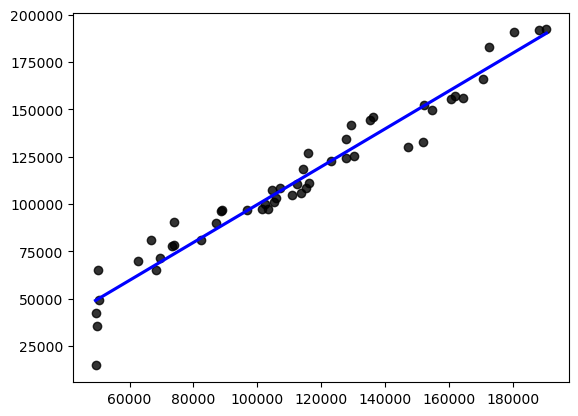

In [48]:
import seaborn as sns
sns.regplot(x=yfull_pred,y=y,scatter_kws={'color':'k'},line_kws={'color':'b'},ci=None)
plt.show()

In [62]:
os.chdir("C:\\Users\\AISHWARYA\\Downloads\\Datasets-main\\ML")

In [63]:
df_Predict=pd.read_csv("50_Startups_Predictions.csv")
print(df_Predict)

    R&D Spend  Administration  Marketing Spend       State
0   120542.52       148718.95        311613.29    New York
1   123334.88       108679.17        304981.62  California
2   101913.08       110594.11        229160.95  California
3   100671.96        91790.61        249744.55     Florida
4    93863.75       127320.38        249839.44  California
5    91992.39       135495.07        252664.93  California
6   119943.24       156547.42        256512.92     Florida
7   114523.61       122616.84        261776.23    New York
8    78013.11       121597.55        264346.06  California
9    72107.60       127864.55        353183.81    New York
10   66051.52       182645.56        118148.20     Florida
11   65605.48       153032.06        107138.38    New York
12   61994.48       115641.28         91131.24    New York
13   61136.38       152701.92         88218.23    New York
14   63408.86       129219.61         46085.25  California
15   55493.95       103057.49        214634.81    New Yo

In [64]:
print(df_Predict.count())

R&D Spend          28
Administration     28
Marketing Spend    28
State              28
dtype: int64


In [65]:
x_Predict=df_Predict.iloc[:,0:1].values
print(x_Predict)

[[120542.52]
 [123334.88]
 [101913.08]
 [100671.96]
 [ 93863.75]
 [ 91992.39]
 [119943.24]
 [114523.61]
 [ 78013.11]
 [ 72107.6 ]
 [ 66051.52]
 [ 65605.48]
 [ 61994.48]
 [ 61136.38]
 [ 63408.86]
 [ 55493.95]
 [ 46426.07]
 [ 46014.02]
 [ 28663.76]
 [ 44069.95]
 [ 20229.59]
 [ 38558.51]
 [ 22177.74]
 [  1000.23]
 [  1315.46]
 [     0.  ]
 [   542.05]
 [     0.  ]]


In [66]:
yone_Predict=reg.predict(x_Predict)
print(yone_Predict)

[152232.86095279 154616.44488025 136330.60130088 135271.16996536
 129459.61990349 127862.20996405 151721.31008683 147095.06455947
 115929.36923955 110888.37211903 105718.84707519 105338.10326888
 102255.72078164 101523.23880648 103463.04843113  96706.80916997
  88966.38421611  88614.65458336  73804.31462961  86955.17872572
  66604.83030328  82250.56334619  68267.78888609  50190.4734756
  50459.55667456  49336.66803799  49799.36685472  49336.66803799]


In [68]:
yone_Predict=pd.DataFrame(yone_Predict,columns=['Prediction'])
result=pd.concat([df_Predict,yone_Predict],axis=1)
result.to_excel('13_aug_Regression_Future.xlsx')
print(result)

    R&D Spend  Administration  Marketing Spend       State     Prediction
0   120542.52       148718.95        311613.29    New York  152232.860953
1   123334.88       108679.17        304981.62  California  154616.444880
2   101913.08       110594.11        229160.95  California  136330.601301
3   100671.96        91790.61        249744.55     Florida  135271.169965
4    93863.75       127320.38        249839.44  California  129459.619903
5    91992.39       135495.07        252664.93  California  127862.209964
6   119943.24       156547.42        256512.92     Florida  151721.310087
7   114523.61       122616.84        261776.23    New York  147095.064559
8    78013.11       121597.55        264346.06  California  115929.369240
9    72107.60       127864.55        353183.81    New York  110888.372119
10   66051.52       182645.56        118148.20     Florida  105718.847075
11   65605.48       153032.06        107138.38    New York  105338.103269
12   61994.48       115641.28         